## A practical Introduction to QC by Elias Combarro:

https://www.youtube.com/watch?v=jwHM8AHOtJ0&ab_channel=CERNLectures

In [1]:
!pip install -q qiskit==0.16.1
!pip install -q --upgrade pylatexenc

In [11]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

import os

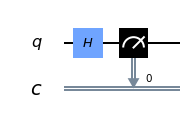

In [3]:
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure(range(1), range(1))
circ.draw(output='mpl')

In [4]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
h q[0];
measure q[0] -> c[0];



{'0': 524, '1': 500}


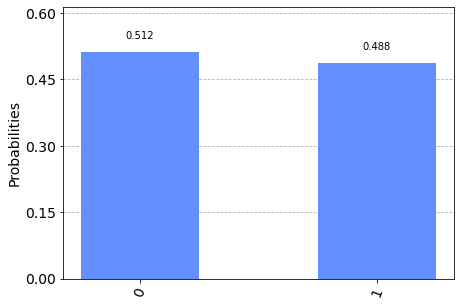

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

In [6]:
circ2 = QuantumCircuit(1, 1)
circ2.h(0)
backend = Aer.get_backend('statevector_simulator')
job = execute(circ2, backend)
result = job.result()
outputstate = result.get_statevector()
print(outputstate)

[0.70710678+0.j 0.70710678+0.j]


In [8]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ2, backend)
result = job.result()
unitary = result.get_unitary()
print(unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


In [17]:
IBMQ.save_account(os.environ['IBMQ_TOKEN'])

In [18]:
provider = IBMQ.load_account()
provider.backends()

for b in provider.backends():
  print(b.status().to_dict())

{'pending_jobs': 35, 'status_msg': 'active', 'backend_name': 'ibmq_qasm_simulator', 'operational': True, 'backend_version': '0.1.547'}
{'pending_jobs': 6, 'status_msg': 'active', 'backend_name': 'ibmqx2', 'operational': True, 'backend_version': '2.2.5'}
{'pending_jobs': 426, 'status_msg': 'active', 'backend_name': 'ibmq_16_melbourne', 'operational': True, 'backend_version': '2.3.4'}
{'pending_jobs': 425, 'status_msg': 'active', 'backend_name': 'ibmq_vigo', 'operational': True, 'backend_version': '1.3.4'}
{'pending_jobs': 515, 'status_msg': 'active', 'backend_name': 'ibmq_ourense', 'operational': True, 'backend_version': '1.3.4'}
{'pending_jobs': 204, 'status_msg': 'active', 'backend_name': 'ibmq_valencia', 'operational': True, 'backend_version': '1.4.4'}
{'pending_jobs': 0, 'status_msg': 'active', 'backend_name': 'ibmq_armonk', 'operational': True, 'backend_version': '1.1.4'}
{'pending_jobs': 6, 'status_msg': 'active', 'backend_name': 'ibmq_athens', 'operational': True, 'backend_versio

{'0': 488, '1': 536}


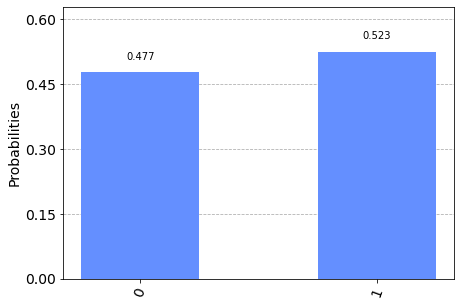

In [19]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ) # obtain the freq.
print(counts)
plot_histogram(counts)

In [20]:
backend = provider.get_backend('ibmq_armonk')
job_exp = execute(circ, backend_sim, shots=1024)
job_monitor(job_exp)

Job Status: job has successfully run


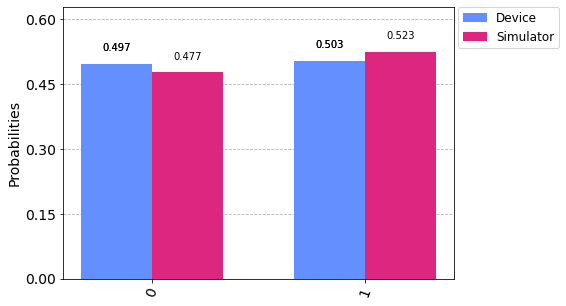

In [21]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp, counts], legend=['Device', 'Simulator'])